# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime 



# Load Data

In [2]:
Self_harm_EDA = pd.read_csv('/Users/hayaldargin/Desktop/Springboard/Springboard_Work/Capstone_2/Final_Data/Self_harm_EDA.csv', index_col=0)
Self_harm_EDA 

,Sex,Race/Ethnicity,Age Group,Year,Injuries,Population
6,Male,White Non-Hispanice,00-04,2001,0,5862483
7,Male,Black,00-04,2001,0,1585658
8,Male,Hispanic,00-04,2001,0,1900490
9,Male,Other Non-Hispanic,00-04,2001,0,518145
11,Female,White Non-Hispanice,00-04,2001,0,5572690
...,...,...,...,...,...,...
5780,Male,Other Non-Hispanic,85+,2018,0,116478
5783,Female,White Non-Hispanice,85+,2018,0,3349454
5784,Female,Black,85+,2018,0,366329
5785,Female,Hispanic,85+,2018,0,304983



Above all, we know that most of our data is categorical features. So the first thing I want to do is create a dummy variable for all categorical features.

Since I loaded my data with pandas, I am going to use the pandas function pd.get_dummies for my first categorical variable sex. Since this variable has only two answer choices: male and female, pd.get_dummies creates a new dataframe which consists of zeros and ones. The dataframe will have a one depending on the sex.

# 1.Encoding categorical variables

In [3]:
#Turn the column of sex into dummy variable 
dummy = pd.get_dummies(Self_harm_EDA['Sex'])
dummy.head()

,Female,Male
6,0,1
7,0,1
8,0,1
9,0,1
11,1,0


Since I’ve created a whole new dataframe, in order to compare it to my original dataframe, I am going to need to either merge or concatenate them to work with them properly. In creating dummy variables, I essentially created new columns for my original dataset. The old and new dataset don’t have any columns in common, so it would make most sense to concatenate them instead of merging.
I chose to put my dummy variable on the right side of my dataframe so when I use pd.concat (the concatenation function) and put my dataframe first, and then the dummy variable I declared. As they are columns, I concatenate them on axis=1.

In [4]:
Self_harm_EDA = pd.concat([Self_harm_EDA, dummy], axis=1)
Self_harm_EDA.head()

,Sex,Race/Ethnicity,Age Group,Year,Injuries,Population,Female,Male
6,Male,White Non-Hispanice,00-04,2001,0,5862483,0,1
7,Male,Black,00-04,2001,0,1585658,0,1
8,Male,Hispanic,00-04,2001,0,1900490,0,1
9,Male,Other Non-Hispanic,00-04,2001,0,518145,0,1
11,Female,White Non-Hispanice,00-04,2001,0,5572690,1,0



Likewise, I will create a dummy variable in the other two features 'Race/Ethnicity' and 'Age Group'.

In [5]:
dummy1 = pd.get_dummies(Self_harm_EDA['Race/Ethnicity'])
dummy1.head()

,Black,Hispanic,Other Non-Hispanic,White Non-Hispanice
6,0,0,0,1
7,1,0,0,0
8,0,1,0,0
9,0,0,1,0
11,0,0,0,1


In [6]:
Self_harm_EDA = pd.concat([Self_harm_EDA, dummy1], axis=1)
Self_harm_EDA.head()

,Sex,Race/Ethnicity,Age Group,Year,Injuries,Population,Female,Male,Black,Hispanic,Other Non-Hispanic,White Non-Hispanice
6,Male,White Non-Hispanice,00-04,2001,0,5862483,0,1,0,0,0,1
7,Male,Black,00-04,2001,0,1585658,0,1,1,0,0,0
8,Male,Hispanic,00-04,2001,0,1900490,0,1,0,1,0,0
9,Male,Other Non-Hispanic,00-04,2001,0,518145,0,1,0,0,1,0
11,Female,White Non-Hispanice,00-04,2001,0,5572690,1,0,0,0,0,1


In [7]:
dummy2 = pd.get_dummies(Self_harm_EDA['Age Group'])
dummy2.head()

,00-04,05-09,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85+
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
Self_harm_EDA = pd.concat([Self_harm_EDA, dummy2], axis=1)

Self_harm_EDA.tail()

,Sex,Race/Ethnicity,Age Group,Year,Injuries,Population,Female,Male,Black,Hispanic,...,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85+
5780,Male,Other Non-Hispanic,85+,2018,0,116478,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5783,Female,White Non-Hispanice,85+,2018,0,3349454,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5784,Female,Black,85+,2018,0,366329,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5785,Female,Hispanic,85+,2018,0,304983,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5786,Female,Other Non-Hispanic,85+,2018,0,198044,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Train/Test Split

In [9]:
len(Self_harm_EDA) * .7, len(Self_harm_EDA) * .3

(1841.6999999999998, 789.3)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(Self_harm_EDA.drop(columns='Injuries'), 
                                                    Self_harm_EDA.Injuries, test_size=0.3, 
                                                    random_state=47)

In [11]:
X_train.shape, X_test.shape

((1841, 29), (790, 29))

In [12]:
y_train.shape, y_test.shape

((1841,), (790,))

In [13]:
#Save the 'Sex', 'Race/Ethnicity', and 'Age Group' columns from the train/test data into cat_train and cat_test
#Then drop those columns from `X_train` and `X_test`. Use 'inplace=True'
cat_list = ['Sex', 'Race/Ethnicity', 'Age Group']
cat_train = X_train[cat_list]
cat_test = X_test[cat_list]
X_train.drop(columns=cat_list, inplace=True)
X_test.drop(columns=cat_list, inplace=True)
X_train.shape, X_test.shape

((1841, 26), (790, 26))

In [14]:
#Check the `dtypes` attribute of `X_train` to verify all features are numeric
X_train.dtypes

Year                   int64
Population             int64
Female                 uint8
Male                   uint8
Black                  uint8
Hispanic               uint8
Other Non-Hispanic     uint8
White Non-Hispanice    uint8
00-04                  uint8
05-09                  uint8
10-14                  uint8
15-19                  uint8
20-24                  uint8
25-29                  uint8
30-34                  uint8
35-39                  uint8
40-44                  uint8
45-49                  uint8
50-54                  uint8
55-59                  uint8
60-64                  uint8
65-69                  uint8
70-74                  uint8
75-79                  uint8
80-84                  uint8
85+                    uint8
dtype: object

In [15]:
#Repeat this check for the test split in `X_test`
X_test.dtypes


Year                   int64
Population             int64
Female                 uint8
Male                   uint8
Black                  uint8
Hispanic               uint8
Other Non-Hispanic     uint8
White Non-Hispanice    uint8
00-04                  uint8
05-09                  uint8
10-14                  uint8
15-19                  uint8
20-24                  uint8
25-29                  uint8
30-34                  uint8
35-39                  uint8
40-44                  uint8
45-49                  uint8
50-54                  uint8
55-59                  uint8
60-64                  uint8
65-69                  uint8
70-74                  uint8
75-79                  uint8
80-84                  uint8
85+                    uint8
dtype: object

In [16]:
#Calculate the mean of `y_train`
train_mean = y_train.mean()
train_mean

1980.6550787615427

sklearn's DummyRegressor easily does this:

In [17]:
#Fit the dummy regressor on the training data
#Hint, call its `.fit()` method with `X_train` and `y_train` as arguments
#Then print the object's `constant_` attribute and verify it's the same as the mean above
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

array([[1980.65507876]])

In [18]:
#One measure is R^2, the coefficient of determination. 
#This is a measure of the proportion of variance in the dependent variable (Injuries).
#Calculate the R^2 as defined above
def r_squared(y, ypred):
    """R-squared score.
    
    Calculate the R-squared, or coefficient of determination, of the input.
    
    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    ybar = np.sum(y) / len(y) #yes, we could use np.mean(y)
    sum_sq_tot = np.mean((y - ybar)**2) #total sum of squares error
    sum_sq_res = np.mean((y - ypred)**2) #residual sum of squares error
    R2 = 1.0 - sum_sq_res / sum_sq_tot
    return R2

In [19]:
y_tr_pred_ = train_mean * np.ones(len(y_train))
y_tr_pred_[:5]

array([1980.65507876, 1980.65507876, 1980.65507876, 1980.65507876,
       1980.65507876])

In [20]:
y_tr_pred = dumb_reg.predict(X_train)
y_tr_pred[:5]

array([1980.65507876, 1980.65507876, 1980.65507876, 1980.65507876,
       1980.65507876])

In [21]:
r_squared(y_train, y_tr_pred)

0.0

In [22]:
y_te_pred = train_mean * np.ones(len(y_test))
r_squared(y_test, y_te_pred)


-0.0009408861079189812

In [23]:

#Calculate the MAE 
def mae(y, ypred):
    """Mean absolute error.
    
    Calculate the mean absolute error of the arguments

    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    abs_error = np.abs(y - ypred)
    mae = np.mean(abs_error)
    return mae

In [24]:
mae(y_train, y_tr_pred)

3078.9975460872065

In [25]:
mae(y_test, y_te_pred)

3000.170303013642

As we can see we get slightly better MSE on the test set than the train set. 

In [26]:
#Calculate the MSE as defined above
def mse(y, ypred):
    """Mean square error.
    
    Calculate the mean square error of the arguments

    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    sq_error = (y - ypred)**2
    mse = np.mean(sq_error)
    return mse

In [27]:
mse(y_train, y_tr_pred)

23637448.563809995

In [28]:
mse(y_test, y_te_pred)

21360297.099130433

In [29]:
np.sqrt([mse(y_train, y_tr_pred), mse(y_test, y_te_pred)])

array([4861.83592523, 4621.72014505])

In [30]:
#R-squared
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.0, -0.0009408861079205355)

In [31]:
#Mean absolute error
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(3078.997546087208, 3000.170303013634)

In [32]:
# Mean squared error
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)


(23637448.563810434, 21360297.099130727)

In [33]:
#Note On Calculating Metrics
# train set - sklearn
# correct order, incorrect order
r2_score(y_train, y_tr_pred), r2_score(y_tr_pred, y_train)


(0.0, -4.572147500576507e+32)

In [34]:
# test set - sklearn
# correct order, incorrect order
r2_score(y_test, y_te_pred), r2_score(y_te_pred, y_test)

(-0.0009408861079205355, -4.131682348444576e+32)

In [35]:
# train set - using our homebrew function
# correct order, incorrect order
r_squared(y_train, y_tr_pred), r_squared(y_tr_pred, y_train)

(0.0, -4.572147500576422e+32)

# 2. Imputing Missing Values

In [36]:
Self_harm_EDA.isna().sum()

Sex                     0
Race/Ethnicity         39
Age Group               0
Year                    0
Injuries                0
Population              0
Female                  0
Male                    0
Black                   0
Hispanic                0
Other Non-Hispanic      0
White Non-Hispanice     0
00-04                   0
05-09                   0
10-14                   0
15-19                   0
20-24                   0
25-29                   0
30-34                   0
35-39                   0
40-44                   0
45-49                   0
50-54                   0
55-59                   0
60-64                   0
65-69                   0
70-74                   0
75-79                   0
80-84                   0
85+                     0
dtype: int64

Here I can see that we had 39 missing values in Race/Ethnicity column. I will impute those values instead of dropping the rows because i do not want to lose more data.

In [37]:
#Impute Race/Ethnicity
# These are the values we'll use to fill in any missing values
X_defaults_most_rep = X_train.fillna(X_train.mode().iloc[0])
X_defaults_most_rep


,Year,Population,Female,Male,Black,Hispanic,Other Non-Hispanic,White Non-Hispanice,00-04,05-09,...,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85+
804,2012,5630885,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3853,2018,725319,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5348,2012,159343,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5458,2018,134499,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2784,2013,1756635,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1655,2005,726792,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1475,2013,784432,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5223,2005,1851696,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4215,2002,210560,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Apply the imputation to both train and test splits

In [38]:
#Call `X_train` and `X_test`'s `fillna()` method, passing `X_defaults_most_rep` as the values to use
#Assign the results to `X_tr` and `X_te`, respectively
X_tr = X_train.fillna(X_defaults_most_rep)
X_te = X_test.fillna(X_defaults_most_rep)

## Scale the data

In [39]:
#Call the StandardScaler`s fit method on `X_tr` to fit the scaler
#then use it's `transform()` method to apply the scaling to both the train and test split
#data (`X_tr` and `X_te`), naming the results `X_tr_scaled` and `X_te_scaled`, respectively
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)

## Train the model on the train split

In [40]:
lm = LinearRegression().fit(X_tr_scaled, y_train)

## Make predictions using the model on both train and test splits

In [41]:
#Call the `predict()` method of the model (`lm`) on both the (scaled) train and test data
#Assign the predictions to `y_tr_pred` and `y_te_pred`, respectively
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

## Assess model performance

In [42]:
# r^2 - train, test
most_rep_r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
most_rep_r2

(0.5899240961563341, 0.6197600253721363)


If we recall that we estimated injuries by simply using a known average. R^2 tells us how much of the variance you're explaining beyond that of using just the mean, and we were using just the mean. Here we see that our simple linear regression model explains over 58% of the variance on the train set and over 60% on the test set. 

In [43]:
#Now calculate the mean absolute error scores using `sklearn`'s `mean_absolute_error` function
# as we did above for R^2
# MAE - train, test
median_mae = mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)
median_mae

(2058.0531816115363, 1954.3839060747566)

In [44]:
#And also do the same using `sklearn`'s `mean_squared_error`
# MSE - train, test
median_mse = mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)
median_mse

(9693148.084362727, 8114404.096928246)

# Pipelines

### 1.Define the pipeline

In [45]:
pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'), 
    StandardScaler(), 
    LinearRegression()
)

In [46]:
type(pipe)

sklearn.pipeline.Pipeline

In [47]:
hasattr(pipe, 'fit'), hasattr(pipe, 'predict')

(True, True)

### 2.Fit the pipeline

In [48]:
#Call the pipe's `fit()` method with `X_train` and `y_train` as arguments
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

### 3.Make predictions on the train and test sets

In [49]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

### 4.Assess performance

In [50]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.5899240961563341, 0.6197600253721363)

In [51]:
most_rep_r2

(0.5899240961563341, 0.6197600253721363)

In [52]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(2058.0531816115363, 1954.3839060747566)

In [53]:
median_mae


(2058.0531816115363, 1954.3839060747566)

In [54]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(9693148.084362727, 8114404.096928246)

In [55]:
median_mse


(9693148.084362727, 8114404.096928246)

# Refining The Linear Model

#### 1. Define the pipeline

In [56]:
#Add `SelectKBest` as a step in the pipeline between `StandardScaler()` and `LinearRegression()`
#Don't forget to tell it to use `f_regression` as its score function
pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'), 
    StandardScaler(),
    SelectKBest(f_regression),
    LinearRegression()
)

#### 2. Fit the pipeline

In [57]:
pipe.fit(X_train, y_train)


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(score_func=<function f_regression at 0x7fb854e19d30>)),
                ('linearregression', LinearRegression())])

#### 3. Assess performance on the train and test set

In [58]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [59]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.5533888963975149, 0.5914600030472754)

In [60]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)


(2069.5855272460954, 1947.2845557293165)

#### 4. Define a new pipeline to select a different number of features

In [61]:
#Modify the `SelectKBest` step to use a value of 15 for k
pipe15 = make_pipeline(
    SimpleImputer(strategy='most_frequent'), 
    StandardScaler(),
    SelectKBest(f_regression, k=15),
    LinearRegression()
)

#### 5. Fit the pipeline¶

In [62]:
pipe15.fit(X_train, y_train)


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k=15,
                             score_func=<function f_regression at 0x7fb854e19d30>)),
                ('linearregression', LinearRegression())])

#### 6. Assess performance on train and test data

In [63]:
y_tr_pred = pipe15.predict(X_train)
y_te_pred = pipe15.predict(X_test)

In [64]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.5685311980671381, 0.6116538584315871)

In [65]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(2004.251337911853, 1862.8224593273287)

#### 7. Assessing performance using cross-validation


In [66]:
cv_results = cross_validate(pipe15, X_train, y_train, cv=5)

In [67]:
cv_scores = cv_results['test_score']
cv_scores

array([0.52818789, 0.55423552, 0.58315308, 0.5377279 , 0.53162361])

In [68]:
np.mean(cv_scores), np.std(cv_scores)

(0.5469856031354583, 0.02017769802865364)

In [69]:
np.round((np.mean(cv_scores) - 2 * np.std(cv_scores), np.mean(cv_scores) + 2 * np.std(cv_scores)), 2)

array([0.51, 0.59])

#### 8. Hyperparameter search using GridSearchCV

In [70]:
#Call `pipe`'s `get_params()` method to get a dict of available parameters and print their names
#using dict's `keys()` method
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'simpleimputer', 'standardscaler', 'selectkbest', 'linearregression', 'simpleimputer__add_indicator', 'simpleimputer__copy', 'simpleimputer__fill_value', 'simpleimputer__missing_values', 'simpleimputer__strategy', 'simpleimputer__verbose', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize'])

In [71]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

In [72]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [73]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='most_frequent')),
                                       ('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x7fb854e19d30>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26]})

In [74]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [75]:
#Print the `best_params_` attribute of `lr_grid_cv`
lr_grid_cv.best_params_

{'selectkbest__k': 24}

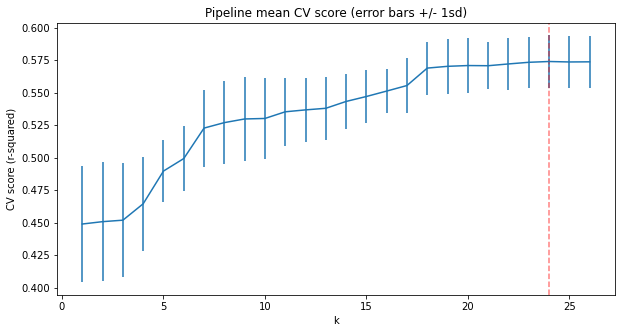

In [76]:
#Assign the value of k from the above dict of `best_params_` and assign it to `best_k`
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');


The above suggests a good value for k is 24. There is an initial rapid increase with k, followed by a stability.  
Which features are most useful? Step into your best model, shown below. Starting with the fitted grid search object, you get the best estimator, then the named step 'selectkbest', for which you can its get_support() method for a logical mask of the features selected.

In [77]:
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()


Similarly, instead of using the 'selectkbest' named step, we can access the named step for the linear regression model and, from that, grab the model coefficients via its coef_ attribute:

In [78]:
#Get the linear model coefficients from the `coef_` attribute and store in `coefs`,
#get the matching feature names from the column names of the dataframe,
#and display the results as a pandas Series with `coefs` as the values and `features` as the index,
#sorting the values in descending order
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False)

Population             3949.465367
15-19                  1021.099195
20-24                   637.218448
30-34                   456.164762
25-29                   435.868042
80-84                   301.163389
85+                     279.593413
35-39                   267.657438
Year                    242.690945
75-79                   197.450428
Female                  187.156172
40-44                   181.935945
45-49                   133.743308
70-74                    98.633082
65-69                     7.818584
60-64                   -91.547126
55-59                  -102.625833
Male                   -187.156172
00-04                  -400.465854
05-09                  -416.601346
Other Non-Hispanic    -2497.091512
Black                 -2714.462864
Hispanic              -3008.263445
White Non-Hispanice   -3414.086573
dtype: float64

These results suggest that Age Group 15-19 is our biggest positive feature. This makes intuitive sense and is consistent with what we saw during the EDA work. We can also see that Age Group 20-24 is strong positive as well. This tells us that people who aged in these age groups are tend to injure themselves the most. 

# Random Forest Model

A model that can work very well in a lot of cases is the random forest. For regression, this is provided by sklearn's RandomForestRegressor class.
Time to stop the bad practice of repeatedly checking performance on the test split. Instead, go straight from defining the pipeline to assessing performance using cross-validation. cross_validate will perform the fitting as part of the process. This uses the default settings for the random forest so we will then proceed to investigate some different hyperparameters.

#### 1. Define the pipeline

In [79]:
#Define a pipeline comprising the steps:
#SimpleImputer() with a strategy of 'most_frequent'
#StandardScaler(),
#and then RandomForestRegressor() with a random state of 47
RF_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

#### 2. Fit and assess performance using cross-validation

In [80]:
#Call `cross_validate` to estimate the pipeline's performance.
#Pass it the random forest pipe object, `X_train` and `y_train`,
#and get it to use 5-fold cross-validation
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5)

In [81]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.90104409, 0.95559443, 0.95315949, 0.95600034, 0.90832677])

In [82]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.9348250238808898, 0.024735495340575047)

#### 3. Hyperparameter search using GridSearchCV


Random forest has a number of hyperparameters that can be explored, however here we will limit ourselves to exploring some different values for the number of trees. We will try it with and without feature scaling, and try most_frequent as strategies for imputing missing values.


In [83]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['most_frequent']
}
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['most_frequent']}

In [84]:
#Call `GridSearchCV` with the random forest pipeline, passing in the above `grid_params`
#dict for parameters to evaluate, 5-fold cross-validation, and all available CPU cores (if desired)
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)


In [85]:
#Now call the `GridSearchCV`'s `fit()` method with `X_train` and `y_train` as arguments
#to actually start the grid search. This may take a minute or two.
rf_grid_cv.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='most_frequent')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'simpleimputer__strat

In [86]:
#Print the best params (`best_params_` attribute) from the grid search
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 54,
 'simpleimputer__strategy': 'most_frequent',
 'standardscaler': StandardScaler()}

It looks like imputing with the most_frequent helps!

In [87]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores


array([0.91040382, 0.95667429, 0.95342711, 0.95531268, 0.90604942])

In [88]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.9363734636633376, 0.02304610529112126)

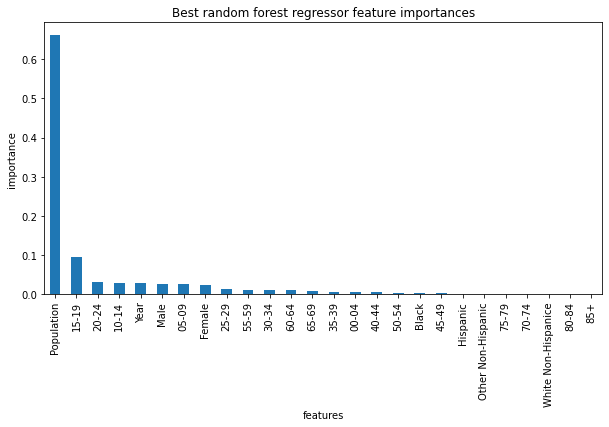

In [89]:
#Plot a barplot of the random forest's feature importances,
#assigning the `feature_importances_` attribute of 
#`rf_grid_cv.best_estimator_.named_steps.randomforestregressor` to the name `imps` to then
#create a pandas Series object of the feature importances, with the index given by the
#training data column names, sorting the values in descending order
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

Encouragingly, the dominant top 3 features are in common with our linear model:

Age-Group :15-19

Age-Group :20-24

Age-Group :10-14




# Final Model Selection

##### 1. Linear regression model performance

In [90]:
# 'neg_mean_absolute_error' uses the (negative of) the mean absolute error
lr_neg_mae = cross_validate(lr_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [91]:
lr_mae_mean = np.mean(-1 * lr_neg_mae['test_score'])
lr_mae_std = np.std(-1 * lr_neg_mae['test_score'])
lr_mae_mean, lr_mae_std

(2092.70205077761, 124.59651546384251)

In [92]:
mean_absolute_error(y_test, lr_grid_cv.best_estimator_.predict(X_test))


1953.8808157229585

#### 2. Random forest regression model performance

In [93]:
rf_neg_mae = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [94]:
rf_mae_mean = np.mean(-1 * rf_neg_mae['test_score'])
rf_mae_std = np.std(-1 * rf_neg_mae['test_score'])
rf_mae_mean, rf_mae_std

(458.8732966868718, 76.47737960374512)

In [95]:
mean_absolute_error(y_test, rf_grid_cv.best_estimator_.predict(X_test))

398.6903187998125

#### Conclusion

The random forest model has a lower cross-validation mean absolute error. It also exhibits less variability. Verifying performance on the test set produces performance consistent with the cross-validation results.


#### Data quantity assessment


Finally, we will need to look into data and see whether there is a need to undertake further data collection. Would more data be useful? We're often led to believe more data is always good, but gathering data invariably has a cost associated with it. Assess this trade off by seeing how performance varies with differing data set sizes. The learning_curve function does this conveniently.

In [96]:
fractions = [.2, .25, .3, .35, .4, .45, .5, .6, .75, .8, 1.0]
train_size, train_scores, test_scores = learning_curve(pipe, X_train, y_train, train_sizes=fractions)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

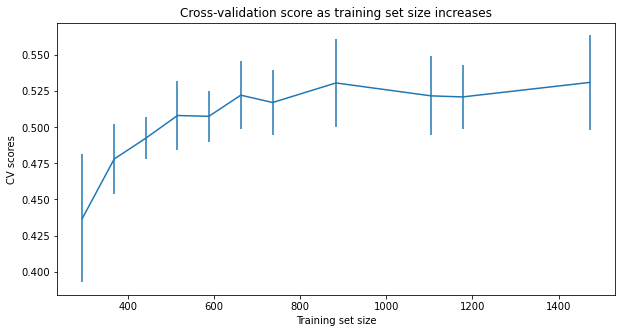

In [97]:
plt.subplots(figsize=(10, 5))
plt.errorbar(train_size, test_scores_mean, yerr=test_scores_std)
plt.xlabel('Training set size')
plt.ylabel('CV scores')
plt.title('Cross-validation score as training set size increases');

This shows that we need to have more data.

In [98]:
#This may not be "production grade ML deployment" practice, but adding some basic
#information to your saved models can save your bacon in development.
#Just what version model have you just loaded to reuse? What version of `sklearn`
#created it? When did you make it?
#Assign the pandas version number (`pd.__version__`) to the `pandas_version` attribute,
#the numpy version (`np.__version__`) to the `numpy_version` attribute,
#the sklearn version (`sklearn_version`) to the `sklearn_version` attribute,
#and the current datetime (`datetime.datetime.now()`) to the `build_datetime` attribute
#Let's call this model version '1.0'
best_model = rf_grid_cv.best_estimator_
best_model.version = '1.0'
best_model.pandas_version = pd.__version__
best_model.numpy_version = np.__version__
best_model.sklearn_version = sklearn_version
best_model.X_columns = [col for col in X_train.columns]
best_model.build_datetime = datetime.datetime.now()


In [99]:
# save the model
modelpath = ('/Users/hayaldargin/Desktop/Springboard/Springboard_Work/Capstone_2/models')
save_file(best_model, 'Self_Injury_model.pkl', modelpath)


NameError: name 'save_file' is not defined

In [ ]:
Self_harm_EDA

In [ ]:
#Save the Data set Self_harm
Self_harm_EDA.to_csv('/Users/hayaldargin/Desktop/Springboard/Springboard_Work/Capstone_2/Final_Data/Self_harm_modeling.csv')
Self_harm_EDA


#### Summary



    From the cross-validation results, we can see that the best number of features is k= 24.  The best features for our model start with Age Group 15-19. It is the best positive feature. Also, we can see that Age Group 20-24 is a strong positive as well. This tells us that people people who are aged in these aged groups are tend to injure themselves the most. We can also see that older gae groups and ypunger aged groups are negatively correlated with the number of injuries. This tells us that younger people and older people are not in thinking of injuring themsleves for some reson. We can asuume that younger people are just kids and older people are more experienced therefore injuring themselves decreases at age around 25. 
 

    After evaluating our model's performance, the random forest model resulted in a lower cross-validation error. Having lover mean absolute error with consistent results, the random forest model was chosen for the next part of the project to help finding people who are tend to injure themselves to help in finding the posibble reasons such as use of social media and guide in solutions.